In [4]:
import pandas as pd
import sqlite3


In [ ]:
# Load CSV file into a pandas DataFrame
df = pd.read_csv('data/Telco-Customer-Churn.csv')
df.head()


In [ ]:
# Convert TotalCharges to numeric (some rows are blank)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows where TotalCharges is NaN
df = df.dropna(subset=['TotalCharges'])

# Optional: Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

df.info()


In [ ]:
# Create SQLite in-memory database connection
conn = sqlite3.connect(':memory:')

# Load DataFrame into a table named 'customers'
df.to_sql('customers', conn, index=False, if_exists='replace')

print("✅ Data loaded into SQLite")


In [6]:
query = """
SELECT 
    gender, 
    SeniorCitizen, 
    Partner, 
    Dependents, 
    COUNT(*) AS total_customers,
    SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) AS churned_customers,
    ROUND(SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS churn_rate
FROM customers
GROUP BY gender, SeniorCitizen, Partner, Dependents
ORDER BY churn_rate DESC
LIMIT 10;
"""

churn_rates = pd.read_sql_query(query, conn)
churn_rates


,gender,SeniorCitizen,Partner,Dependents,total_customers,churned_customers,churn_rate
0,Female,1,No,No,317,158,49.84
1,Male,1,No,No,244,118,48.36
2,Male,1,Yes,No,281,105,37.37
3,Female,1,Yes,No,209,73,34.93
4,Female,1,No,Yes,3,1,33.33
5,Female,0,No,No,1338,429,32.06
6,Male,0,No,No,1381,418,30.27
7,Male,1,Yes,Yes,44,12,27.27
8,Male,0,Yes,No,567,128,22.57
9,Female,0,No,Yes,142,32,22.54


Matplotlib is building the font cache; this may take a moment.


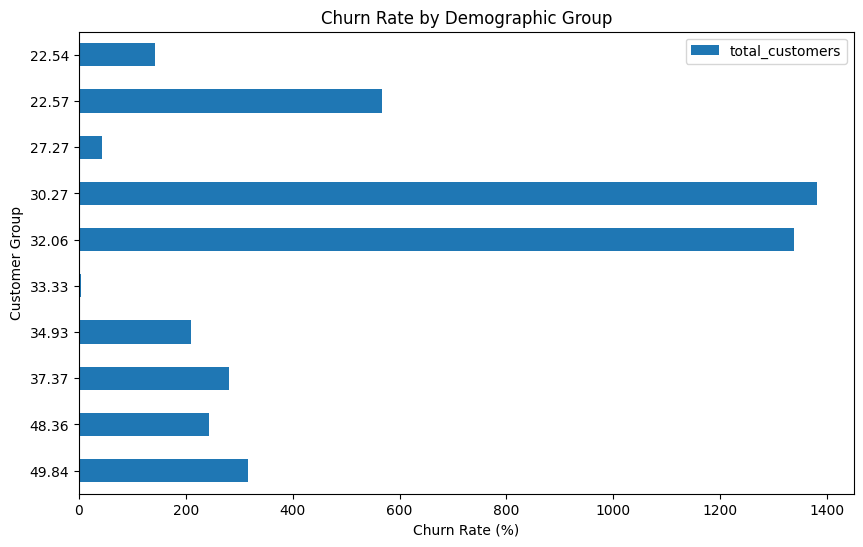

In [8]:
import matplotlib.pyplot as plt

churn_rates.plot(
    x='churn_rate',
    y='total_customers',
    kind='barh',
    title='Churn Rate by Demographic Group',
    figsize=(10, 6)
)
plt.xlabel("Churn Rate (%)")
plt.ylabel("Customer Group")
plt.show()


In [9]:
query = """
SELECT 
    Contract, 
    PaymentMethod,
    COUNT(*) AS total_customers,
    SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) AS churned_customers,
    ROUND(SUM(CASE WHEN Churn = 'Yes' THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS churn_rate
FROM customers
GROUP BY Contract, PaymentMethod
ORDER BY churn_rate DESC
LIMIT 10;
"""

contract_churn = pd.read_sql_query(query, conn)
contract_churn


,Contract,PaymentMethod,total_customers,churned_customers,churn_rate
0,Month-to-month,Electronic check,1850,994,53.73
1,Month-to-month,Bank transfer (automatic),589,201,34.13
2,Month-to-month,Credit card (automatic),543,178,32.78
3,Month-to-month,Mailed check,893,282,31.58
4,One year,Electronic check,347,64,18.44
5,One year,Credit card (automatic),398,41,10.30
6,One year,Bank transfer (automatic),391,38,9.72
7,Two year,Electronic check,168,13,7.74
8,One year,Mailed check,337,23,6.82
9,Two year,Bank transfer (automatic),564,19,3.37


In [10]:
query = """
SELECT 
    Churn,
    ROUND(AVG(MonthlyCharges), 2) AS avg_monthly_charges,
    ROUND(AVG(tenure), 2) AS avg_tenure_months,
    COUNT(*) AS customer_count
FROM customers
GROUP BY Churn;
"""

churn_summary = pd.read_sql_query(query, conn)
churn_summary


,Churn,avg_monthly_charges,avg_tenure_months,customer_count
0,No,61.27,37.57,5174
1,Yes,74.44,17.98,1869


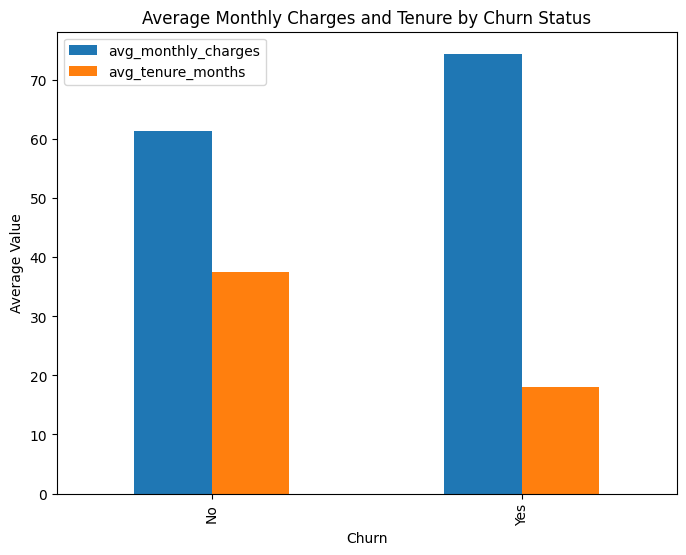

In [11]:
import matplotlib.pyplot as plt

churn_summary.plot(
    x='Churn',
    y=['avg_monthly_charges', 'avg_tenure_months'],
    kind='bar',
    figsize=(8, 6),
    title='Average Monthly Charges and Tenure by Churn Status'
)
plt.ylabel('Average Value')
plt.show()
